In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/02_figures/'
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

### Read invivo/exvivo results

In [3]:
IPA_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/IPA_results/'

In [4]:
## read in vivo regulons
ipa = pd.read_csv(IPA_dir + 'IPA_conserved_pathways_vascularEC.csv', sep = ',')
ipa

,IPA canonical pathways,invivo,exvivo
0,WNT/Ca+ pathway,2.121,3.272
1,Protein Kinase A Signaling,1.857,1.925
2,CSDE1 Signaling Pathway,1.667,0.943
3,Factors Promoting Cardiogenesis in Vertebrates,1.414,2.940
4,"D-myo-inositol (1,4,5)-Trisphosphate Biosynthesis",1.342,2.121
...,...,...,...
89,Angiopoietin Signaling,-1.941,-0.626
90,Dopamine Degradation,-2.000,-0.333
91,Fatty Acid β-oxidation I,-2.000,-3.207
92,Noradrenaline and Adrenaline Degradation,-2.000,-1.265


In [5]:
ipa.sort_values(by = 'invivo', ascending = False).head(25)

,IPA canonical pathways,invivo,exvivo
0,WNT/Ca+ pathway,2.121,3.272
1,Protein Kinase A Signaling,1.857,1.925
2,CSDE1 Signaling Pathway,1.667,0.943
3,Factors Promoting Cardiogenesis in Vertebrates,1.414,2.940
4,"D-myo-inositol (1,4,5)-Trisphosphate Biosynthesis",1.342,2.121
5,Gluconeogenesis I,1.342,0.378
6,Superpathway of Inositol Phosphate Compounds,1.219,1.270
7,GP6 Signaling Pathway,1.213,3.087
8,Cell Cycle: G2/M DNA Damage Checkpoint Regulation,1.134,1.225
9,NUR77 Signaling in T Lymphocytes,1.069,1.789


In [6]:
pathways = ['WNT/Ca+ pathway',
            'Protein Kinase A Signaling',
            'p38 MAPK Signaling',
            'CSDE1 Signaling Pathway',
            'GP6 Signaling Pathway',
            'Cell Cycle: G2/M DNA Damage Checkpoint Regulation',
            'Endocannabinoid Neuronal Synapse Pathway',
            'FGF Signaling',
            'TGF-β Signaling',
            'Interferon Signaling',
            'IL-7 Signaling Pathway',
            'Ferroptosis Signaling Pathway',
            'Angiopoietin Signaling',
            'Fatty Acid β-oxidation I',
            'Inhibition of Matrix Metalloproteases',
            'HIPPO signaling',
            'Dopamine Degradation',
            'Noradrenaline and Adrenaline Degradation',
            'Chemokine Signaling',
            'Antioxidant Action of Vitamin C'
]

In [7]:
ipa = ipa[ipa['IPA canonical pathways'].isin(pathways)]

In [8]:
conserved_invivo = ipa[['IPA canonical pathways','invivo']]
conserved_invivo = conserved_invivo.sort_values(by = 'invivo', ascending = False)
conserved_invivo.rename(columns = {'invivo':'z-score'}, inplace = True)
conserved_invivo['condition'] = 'invivo'
conserved_exvivo = ipa[['IPA canonical pathways','exvivo']]
conserved_exvivo.rename(columns = {'exvivo':'z-score'}, inplace = True)
conserved_exvivo['condition'] = 'exvivo'

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
conserved_induced = pd.concat([conserved_invivo, conserved_exvivo], axis=0)

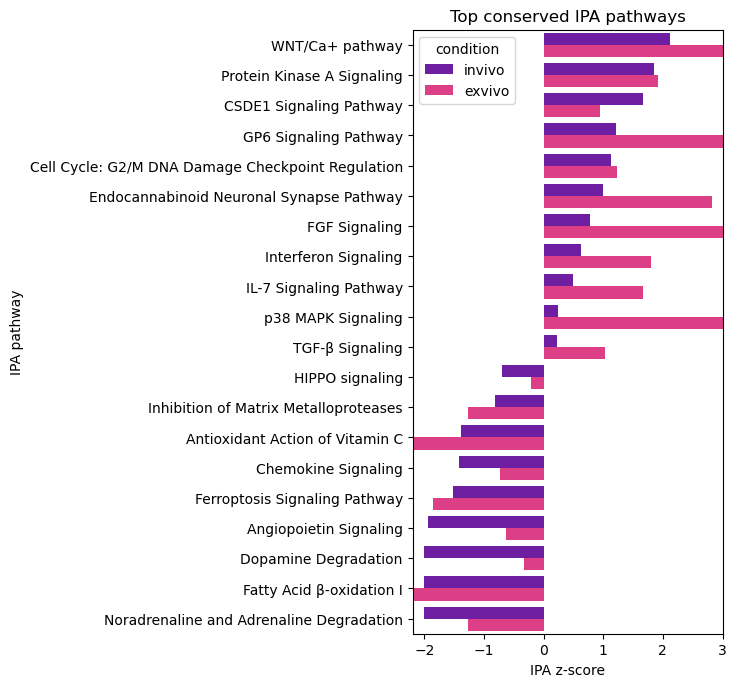

In [10]:
sb.barplot(data = conserved_induced,
           x = 'z-score',
           y = 'IPA canonical pathways',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top conserved IPA pathways',
                xlabel = 'IPA z-score',
                ylabel = 'IPA pathway',
                xlim = (-2.2,3)
               )
plt.savefig(fig_dir + 'barplot_vascularEC_IPA_conserved_pathway.pdf')
plt.show()